<a href="https://colab.research.google.com/github/kevinsandry/sanbercode-finalproject/blob/main/Final_Project_Muhammad_Kevin_Sandryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, tugas yang diberikan adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian memberikan rekomendasi terkait negara apa saja yang perlu menjadi fokus CEO.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px


warnings.simplefilter(action="ignore", category=FutureWarning)

In [24]:
df = pd.read_csv('/content/Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


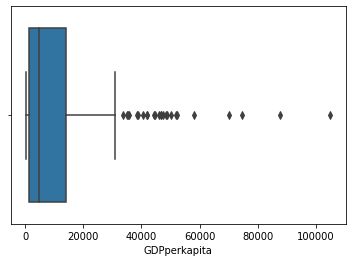

In [ ]:
sns.boxplot(df['GDPperkapita'])

#Cek duplicate & missing value

Jumlah negara pada dataset:  167


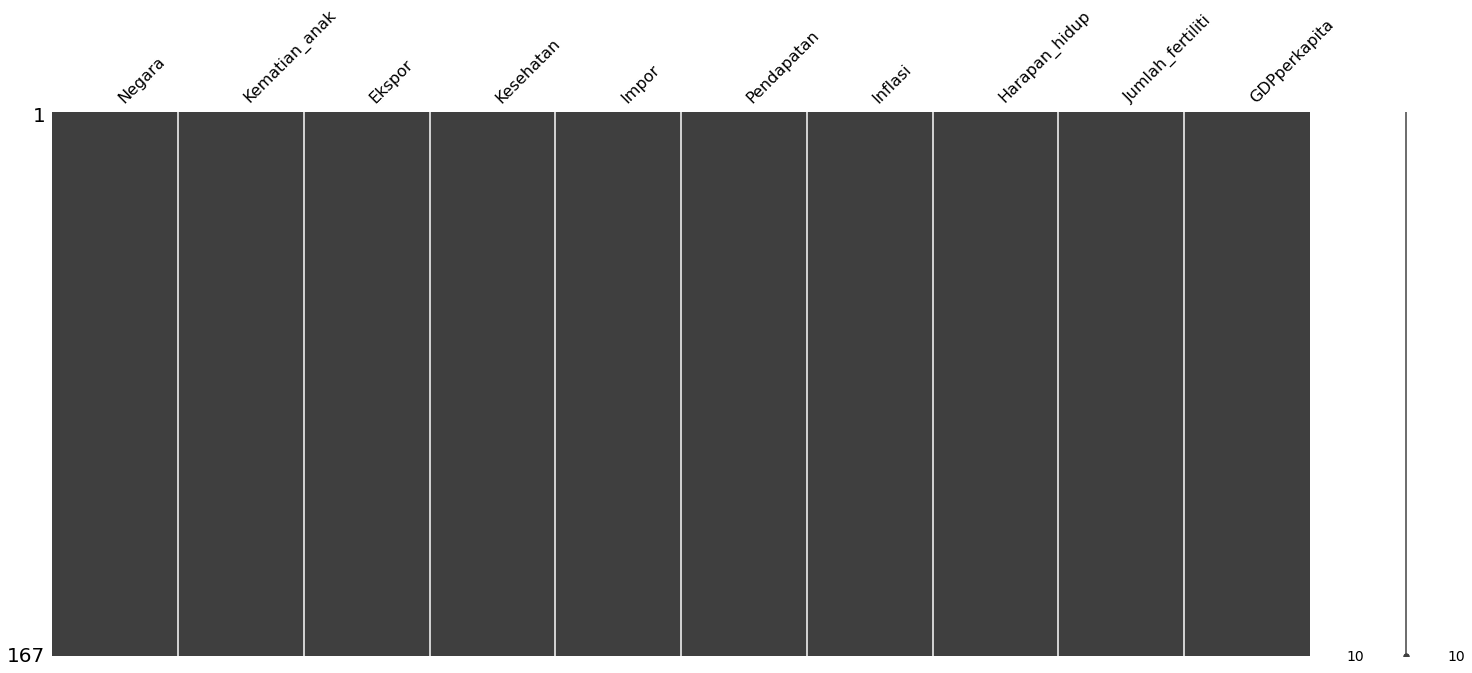

In [ ]:
import missingno as mn

print('Jumlah negara pada dataset: ',len(df['Negara'].unique()))
# Null Value Visualization
mn.matrix(df)

Tidak ada missing value dan duplikat dari data

#Analisis Univariat

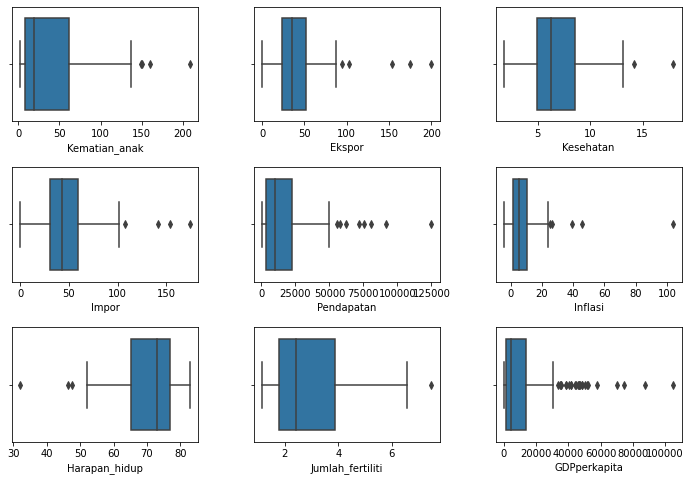

In [ ]:
df_uni = df.drop(columns=['Negara'])

# Create figure with appropriate space between subplots
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot data by looping through arrays of variables and list of colors
for idx, columns in zip(range(len(df_uni.columns)), df_uni.columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.boxplot(df[columns])

#Analisis Bivariat

Analisa bivariat pada kasus ini bertujuan untuk mengetahui negara apa saja yang memiliki aspek kesehatan, sosial, serta ekonomi yang lebih rendah dibandingkan negara diluar wilayah tersebut. 

In [ ]:
def top_10_largest(val):
    temp = df[['Negara',val]]
    
    temp = temp.nlargest(10, columns=[val])
    temp.reset_index(drop=True, inplace=True)

    df_fed = df.groupby('Negara')[val].sum().reset_index()

    fig = px.choropleth(df_fed, locations="Negara",
                        color=val,
                        locationmode = 'country names',
                        hover_name="Negara", 
                        range_color=[np.percentile(df_fed[val], 75), temp[val].min()],  
                        color_continuous_scale='Inferno_r',
                        )

    fig.show()
    print()
    sns.barplot(x=val, y='Negara', data=temp, palette="rocket")

def top_10_smallest(val):
    temp = df[['Negara',val]]
    
    temp = temp.nsmallest(10, columns=[val])
    temp.reset_index(drop=True, inplace=True)

    df_fed = df.groupby('Negara')[val].sum().reset_index()

    fig = px.choropleth(df_fed, locations="Negara",
                        color=val,
                        locationmode = 'country names',
                        hover_name="Negara", 
                        range_color=[temp[val].max(), np.percentile(df_fed[val], 25)],  
                        color_continuous_scale='Inferno',
                        )

    fig.show()
    print()

    sns.barplot(x=val, y='Negara', data=temp, palette="rocket")

##Top 10 Negara dengan Kematian Anak Tertinggi

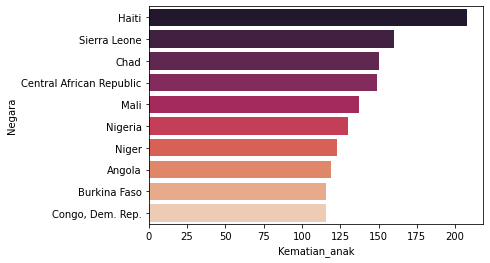

In [ ]:
top_10_largest('Kematian_anak')

##Top 10 Negara dengan Harapan Hidup Terendah

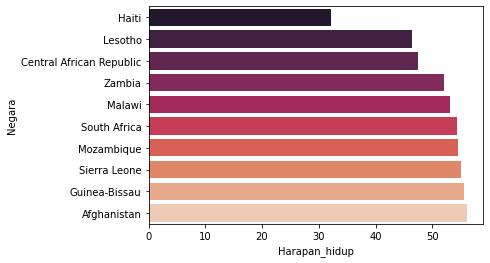

In [ ]:
top_10_smallest('Harapan_hidup')

##Top 10 Negara dengan Angka Kelahiran Tertinggi

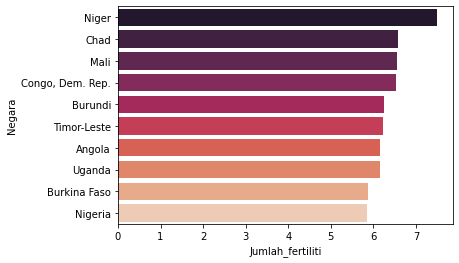

In [ ]:
top_10_largest('Jumlah_fertiliti')

##Top 10 Negara dengan Pengeluaran Biaya untuk Kesehatan Terendah

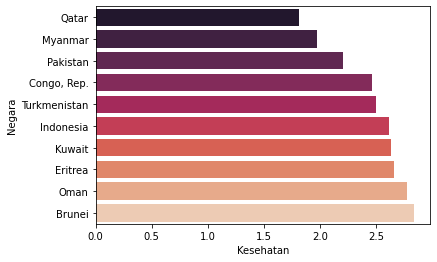

In [ ]:
top_10_smallest('Kesehatan')

##Top 10 Negara dengan Pendapatan Per Kapita Terendah

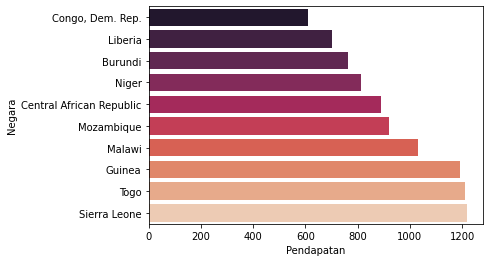

In [ ]:
top_10_smallest('Pendapatan')

##Top 10 Negara dengan GDP Per Kapita Terendah

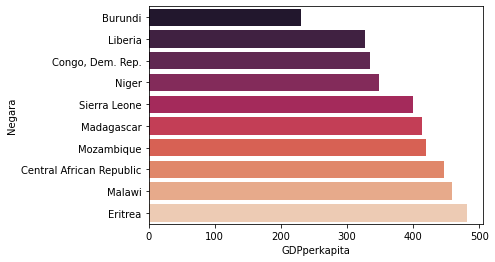

In [ ]:
top_10_smallest('GDPperkapita')

##Top 10 Negara dengan Tingkat Inflasi Tertinggi

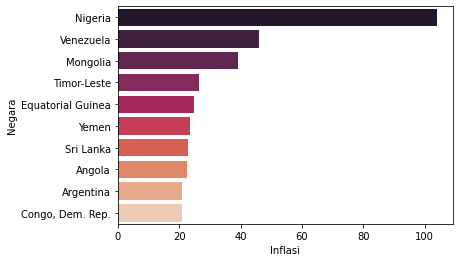

In [ ]:
top_10_largest('Inflasi')

##Top 10 Negara dengan Impor Terendah

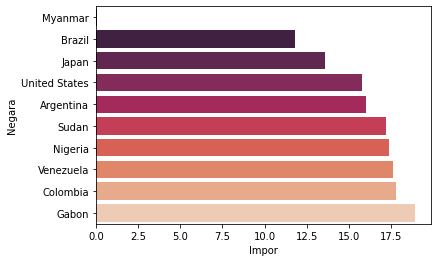

In [ ]:
top_10_smallest('Impor')

#Top 10 Negara dengan Ekspor Terendah

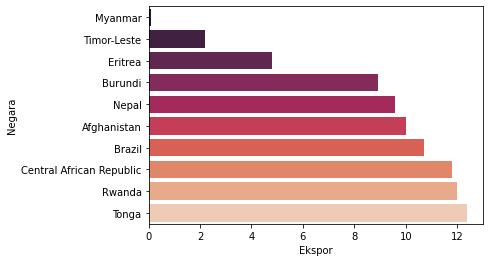

In [ ]:
top_10_smallest('Ekspor')

Insight:<br>
Dari analisa bivariat di atas, dapat dilihat bahwa negara-negara di wilayah Afrika Barat dan Afrika Tengah memiliki aspek kesehatan, sosial, serta ekonomi yang lebih rendah dibandingkan negara diluar wilayah tersebut. 

#Analisis Korelasi

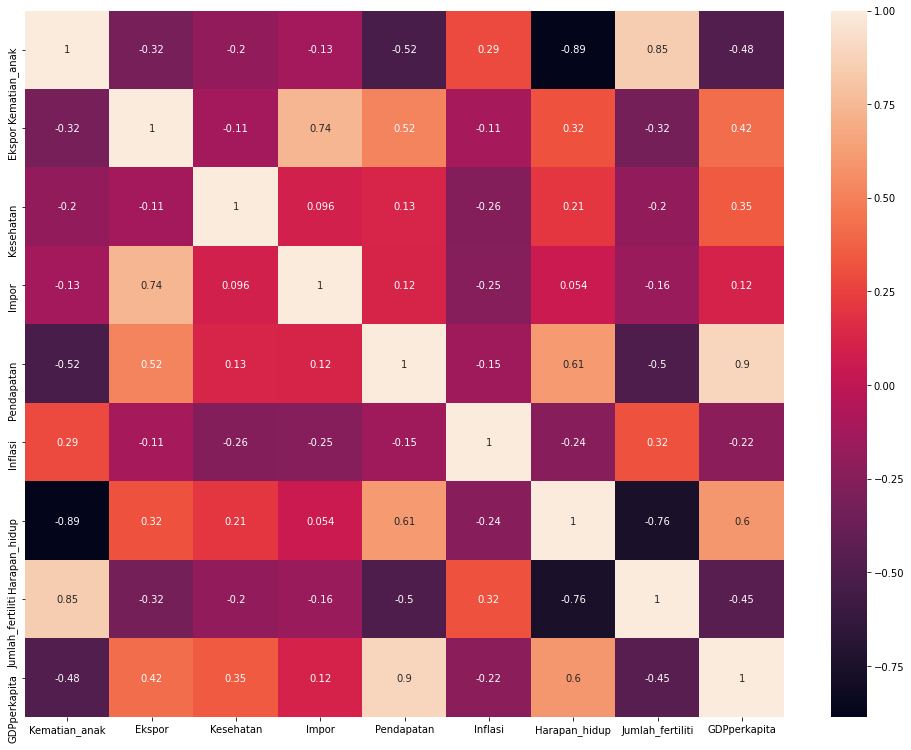

In [ ]:
plt.figure(figsize = (17, 13))
sns.heatmap(df.corr(), annot = True)
plt.savefig('Correlation')
plt.show()

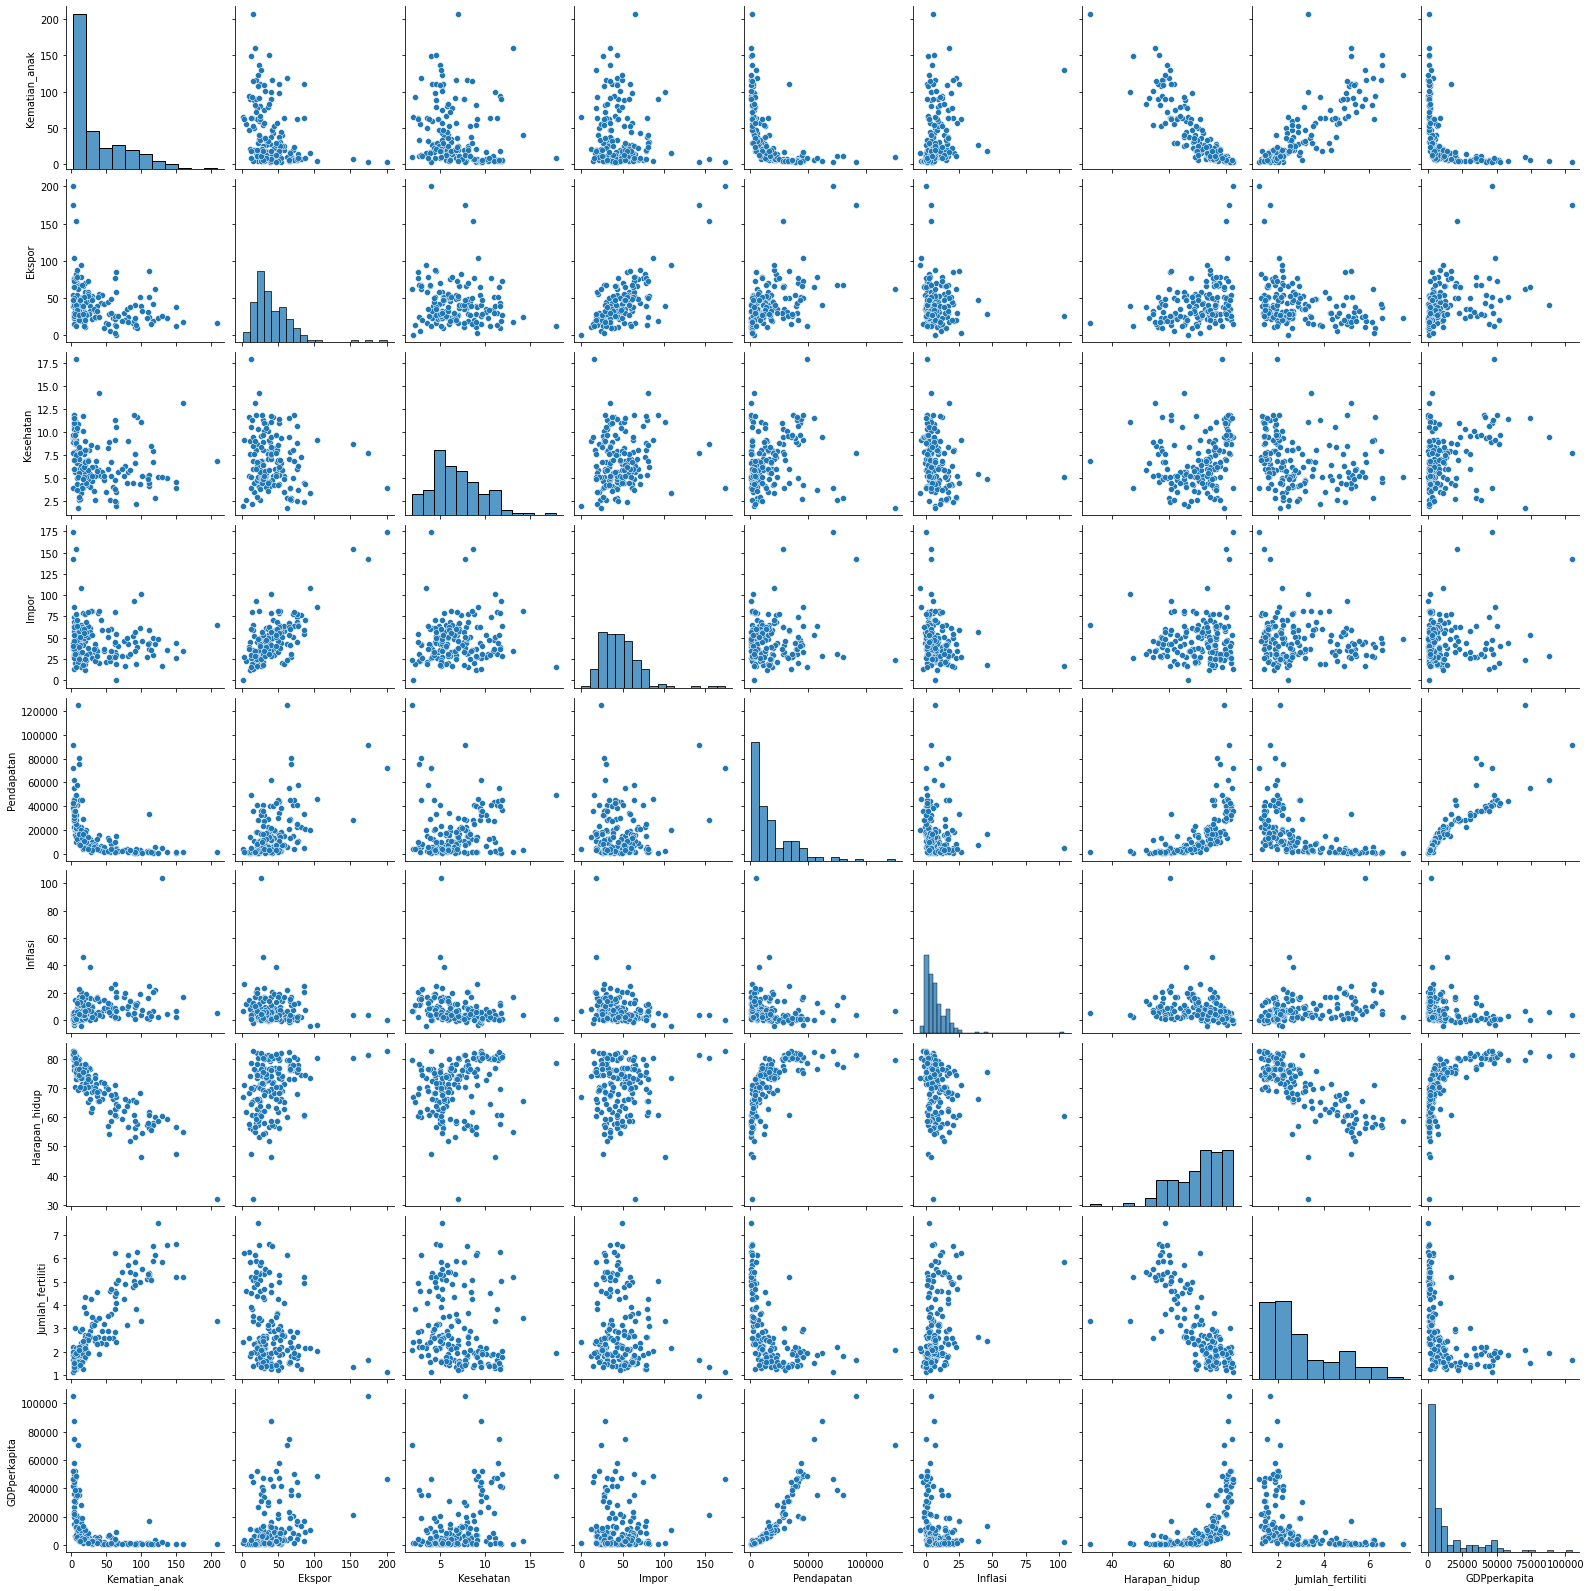

In [ ]:
sns.pairplot(df)

Interpretasi kekuatan korelasi mengacu pada tabel berikut (Hinkle DE, Wiersma W, Jurs SG. Applied Statistics for the Behavioral Sciences. 5th ed. Boston: Houghton Mifflin; 2003.):
<p>

.90 to 1.00 (−.90 to −1.00):	Very high positive (negative) correlation<br>
.70 to .90 (−.70 to −.90)	High positive (negative) correlation<br>
.50 to .70 (−.50 to −.70)	Moderate positive (negative) correlation<br>
.30 to .50 (−.30 to −.50)	Low positive (negative) correlation<br>
.00 to .30 (.00 to −.30)	negligible correlation

## Insight:

1. `GDPperkapita` memiliki korelasi positif yang kuat dengan `Pendapatan`. Artinya semakin tinggi GDP pada suatu negara, maka pendapatan pada seseorang di negara tersebut juga semakin tinggi.
2. `Ekspor` dan `Impor` memiliki korelasi positif. Artinya negara-negara tersebut cenderung aktif dalam perdagangan internasional, baik dalam kegiatan ekspor maupun impor.
3. Tingkat kelahiran (`Jumlah_fertiliti`) memiliki korelasi yang paling kuat dengan `Kematian_anak` dibandingkan dengan variable lain. Semakin tinggi tingkat kelahiran di suatu negara, semakin tinggi pula tingkat kematian anak di negara tersebut. Namun, tidak ada variable tambahan yang menjelaskan mengapa hal tersebut dapat terjadi.
4. Selain itu, `Jumlah_fertiliti` juga memiliki korelasi negatif yang kuat dengan variable `Harapan hidup` dan `Pendapatan`.
5. Variable `Harapan_hidup` memiliki korelasi negatif yang kuat dengan `Kematian_anak`. Artinya semakin rendah harapan hidup di suatu negara, maka tingkat kematian anak di negara tersebut semakin tinggi. Hal ini dapat terjadi karena kematian_anak berperan besar dalam menurunkan nilai `Harapan_hidup`. Selain itu harapan hidup juga memiliki korelasi positif yang kuat dengan pendapatan dan GDP per kapita. 
5. Dari poin 4 dan 5 dapat diinterpretasikan bahwa orang-orang dari negara yang memiliki harapan hidup yang rendah didasari oleh pendapatan yang rendah pula, sehingga mereka cenderung tidak mampu memenuhi kebutuhan dasar mereka maupun anak-anak mereka. 
6. Terdapat juga insight dimana orang-orang dari negara yang memiliki tingkat ekonomi yang rendah (`Pendapatan` dan `GDPperkapita`) cenderung memiliki tingkat kelahiran (`Jumlah_fertiliti`) yang tinggi, walaupun kekuatan korelasinya rendah. Namun tidak ada variable lain yang bisa menjelaskan mengapa hal ini bisa terjadi.
7. Variable `Kesehatan` tidak memiliki korelasi yang kuat dengan seluruh variable. Hal ini mengindikasikan bahwa masyakarat di negara yang maju dari segi ekonomi belum tentu mengeluarkan biaya yang besar untuk kesehatan.




#Handling Outlier

Saya hanya akan menghapus outlier pada variable pendapatan, gdp perkapita, ekspor, impor. Karena negara yang memiliki nilai tinggi pada variable2 tersebut dianggap sebagai negara-negara yang maju dari segi ekonomi, sehingga tidak memerlukan bantuan keuangan.

In [27]:
from scipy import stats 

def handle_outlier(var):
    IQR = stats.iqr(df[var], interpolation = 'midpoint')   
    print('Interquartile range is', IQR) 

    Q1,Q3 = np.percentile(df[var] , [25,75])

    up_lim = Q3 + 1.5 * IQR 
    print('Batas Atas: ', up_lim) 

    print("Outlier:\n", df[df[var] > up_lim]['Negara'])
    df.drop(df[df[var] > up_lim].index, inplace=True)

In [28]:
handle_outlier('Pendapatan')

Interquartile range is 19445.0
Batas Atas:  51967.5
Outlier:
 23                   Brunei
82                   Kuwait
91               Luxembourg
114                  Norway
123                   Qatar
133               Singapore
145             Switzerland
157    United Arab Emirates
Name: Negara, dtype: object


In [29]:
handle_outlier('GDPperkapita')

Interquartile range is 10840.0
Batas Atas:  28410.0
Outlier:
 7           Australia
8             Austria
15            Belgium
29             Canada
42             Cyprus
44            Denmark
53            Finland
54             France
58            Germany
68            Iceland
73            Ireland
74             Israel
75              Italy
77              Japan
110       Netherlands
111       New Zealand
139             Spain
144            Sweden
158    United Kingdom
159     United States
Name: Negara, dtype: object


In [30]:
df.value_counts()

Negara       Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita
Zambia       83.1           37.00   5.89       30.9   3280        14.00    52.0           5.40              1460            1
Eritrea      55.2           4.79    2.66       23.3   1420        11.60    61.7           4.61              482             1
Ghana        74.7           29.50   5.22       45.9   3060        16.60    62.2           4.27              1310            1
Georgia      16.5           35.00   10.10      52.8   6730        8.55     72.8           1.92              2960            1
Gambia       80.3           23.80   5.69       42.7   1660        4.30     65.5           5.71              562             1
                                                                                                                           ..
Paraguay     24.1           55.10   5.87       51.5   7290        6.10     74.1           2.73              3230           

Jumlah negara yang dihapus dari dataset adalah 28 Negara

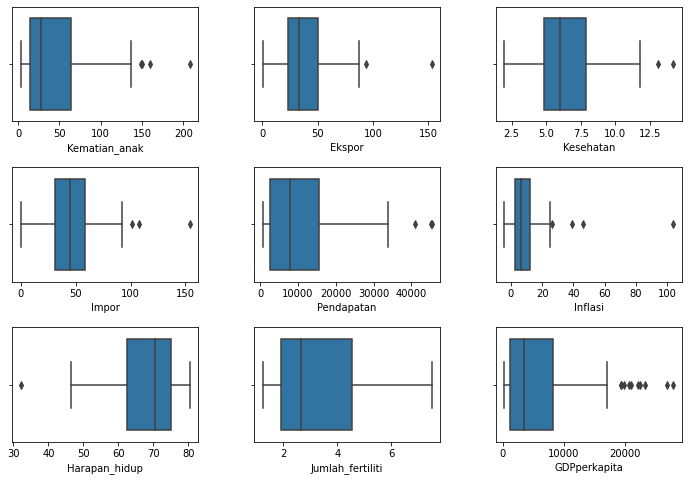

In [32]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df.drop(columns='Negara').columns)), df.drop(columns='Negara').columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.boxplot(df[columns])

Walaupun masih terdapat beberapa outlier, namun tidak akan berpengaruh pada model cluster yang akan dibuat nanti.

#Clustering

##Feature Scaling

In [33]:
from sklearn import preprocessing

x = df.iloc[:,1:10] #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi', 'Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])

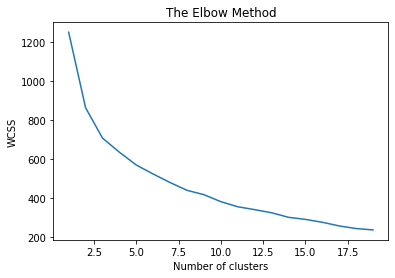

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
X = df_scaled
y = kmeans.fit_predict(X)
df['Cluster'] = y
df.groupby('Cluster').agg('mean')

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Cluster,,,,,,,,,
0,97.448780,26.029512,6.337805,42.387805,2188.609756,11.902317,59.043902,5.181951,1004.439024
1,26.702778,35.792903,6.270833,44.596749,9789.305556,8.562903,71.247222,2.467500,4791.416667
2,12.846154,62.953846,6.835385,59.650000,25473.076923,4.334269,76.026923,1.970000,16236.538462


In [43]:
df['Cluster'].value_counts()

1    72
0    41
2    26
Name: Cluster, dtype: int64

In [44]:
import plotly.express as px

df_fed = df.groupby('Negara')['Cluster'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Negara",
                    color="Cluster",
                    locationmode = 'country names',
                    hover_name="Negara", 
                    color_continuous_scale=px.colors.diverging.RdYlGn,
                    title = 'Country Clustering')


fig.show()

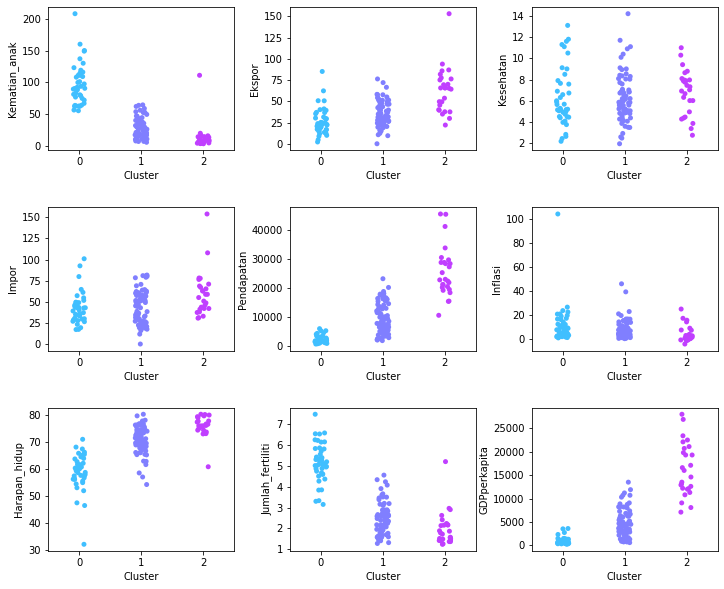

In [45]:
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df.drop(columns=['Negara','Cluster']).columns)), df.drop(columns=['Negara','Cluster']).columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.stripplot(x='Cluster', y=columns, data=df, palette="cool")

Dari diagram diatas dapat dilihat bahwa negara-negara pada cluster 0 merupakan negara yang faktor sosial ekonomi serta kesehatannya lebih rendah dibandingkan negara dengan cluster lain. Maka dari itu, kita akan fokus pada negara yang ada di cluster 0

In [47]:
cluster_0=df[df['Cluster']==0]
cluster_0.sort_values(['Kematian_anak','Harapan_hidup','Jumlah_fertiliti','Pendapatan','GDPperkapita','Inflasi','Kesehatan','Impor','Ekspor'],
                      ascending=[False,True,False,True,True,False,True,False,False]).head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0


Dari data diatas, 10 Negara yang direkomendasikan mendapatkan bantuan finansial dari HELP berdasarkan hasil analisis cluster adalah:<br>
Haiti<br>
Sierra Leone<br>
Chad<br>
Central African Republic<br>
Mali<br>
Nigeria<br>
Niger<br>
Angola<br>
Congo<br>
Burkina Faso